In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from numpy import linalg as LA

import sys
sys.path.append("..")

from utils import *
from template import *
from vis import *

In [6]:
def upscale_dic_(dic_L, batch_size=(6,6), upscale=2):
    w, h = batch_size
    N = len(dic_L['names'])
    dic_H = {}
    data = []
    params = []
    names = []
    
    for i in range(N):
        name = dic_L['names'][i]
        Theta = dic_L['params'][i]
        if name == '2Dtanh':
            # th b xi
            Theta[1] *= upscale
            img = np.zeros((w*upscale, h*upscale))
            for w_ in range(w*upscale):
                for h_ in range(h*upscale):
                    img[w_, h_] = tanh2d(w_, h_, Theta[0], Theta[1], Theta[2])
        
        params.append(Theta)
        names.append(name)
        data.append(data)
                 
    
    
    data = np.array(data).reshape(N, -1)
    dic['data'] = data
    dic['params'] = params
    dic['names'] = names
    
    return dic

In [ ]:
class Dictionary():
    def __init__(self, batch_size=(6, 6), dtype=1, upscale=2):
        self.upscale = upscale
        self.batch_size = batch_size
        
        if dtype == 1: self.dic1()
        self.size = len(self.params)
        

    def dic1(self):
        ths = 2 * np.pi * np.arange(12) / 12
        bs = np.linspace(-6, 6, 13)
        dic1_L = generate_dic_AHF(ths, bs, [1.0], (6,6), comb=True)
        dic1_H = upscale_dic_(dic1_L, self.batch_size, upscale=self.upscale)
        self.data_L = dic1_L['data']
        self.data_H = dic1_H['data']
        self.params = dic1['params']
        
        print(self.data_L.shape)
        print(self.data_H.shape)
        
ahf_dic = Dictionary()
vis_batches(ahf_dic.data_L)
vis_batches(ahf_dic.data_H)

In [3]:
img_L = imgcut(numpy_from_img_route(img_route()))
img_L.shape

/home/e/Eulring/GitProject/Mixture-Function-Sparse-Representation/dataset/Set14/image_SRF_2/img_001_SRF_2_LR.png


(238, 250)

In [9]:
class ImageMFSR():
    def __init__(self, img, batch_size = (6,6)):
        self.img = img
        self.batch_size = batch_size
        if np.max(img>1): self.img = self.img / 255.0
        
        self.dic = Dictionary()
        self.get_batches()
        self.batch_size = batch_size
        
        


    def get_batches(self):
        self.patches = []
        w, h = self.img.shape
        dw = int(self.batch_size[0] - self.batch_size[0]/3)
        dh = int(self.batch_size[1] - self.batch_size[1]/3)
        for i in range(0, w, dw):
            for j in range(0, h, dh):
                tmp = {}
                tmp['data'] = self.img[i:i+dw, j:j+dh]
                tmp['coordinate'] = (i, j)
                tmp['rep'] = np.zeros(self.dic.size)
                self.patches.append(tmp)
    
    def super_resolution(self):
        high_r_img = np.zeros(self.img.shape)
        num_patches = len(self.patches)
        for patch in patches:
            
                
img_L = imgcut(numpy_from_img_route(img_route()))
img_rep = ImageMFSR(img_L)
img_rep.super_resolution()

/home/e/Eulring/GitProject/Mixture-Function-Sparse-Representation/dataset/Set14/image_SRF_2/img_001_SRF_2_LR.png


/home/e/Eulring/OtherProj/AMFR/img/Set14/image_SRF_2/img_001_SRF_2_LR.png


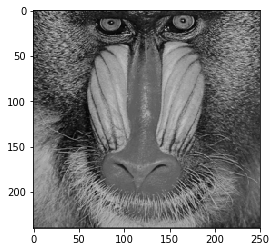

In [11]:
batch_size = (6, 6)

img_L = numpy_from_img_route(img_route())
img_H = numpy_from_img_route(img_route(method = 'HR'))
print(img_route())
vis_img(img_L, v_max = 255)

In [ ]:



def get_batches(img, batch_size = (6, 6)):
    img = 
    


